In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from country_converter import CountryConverter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
csv_file_path = 'heart_attack_prediction_dataset.csv'
df = pd.read_csv(csv_file_path)

In [3]:
diet_mapping = {'Healthy': 3, 'Average': 2, 'Unhealthy': 1}

df['Numeric_Diet'] = df['Diet'].map(diet_mapping)
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Numeric_Diet
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,2
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,1
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,3
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,2
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,3
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,3
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,2
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,1


In [5]:
numeric_columns = df.select_dtypes(include=['number']).columns

In [6]:
binary_columns = []
for column in numeric_columns:
    unique_values = df[column].unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        binary_columns.append(column)

numeric_columns = [col for col in numeric_columns if col not in binary_columns]  #remove binary from numeric

In [7]:
outliers = []
for numeric_column in numeric_columns:
    Q1 = df[numeric_column].quantile(0.25)
    Q3 = df[numeric_column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers.append(len(df[(df[numeric_column] < lower_limit) |
                           (df[numeric_column] > upper_limit)]))

table = pd.DataFrame({
    'Name': numeric_columns,
    'Type': df[numeric_columns].dtypes,
    'Range': df[numeric_columns].max() - df[numeric_columns].min(),
    'Min': df[numeric_columns].min(),
    'Max': df[numeric_columns].max(),
    'Mean': df[numeric_columns].mean(),
    'Mode': df[numeric_columns].mode().iloc[0],
    'Median': df[numeric_columns].median(),
    'Outlier': outliers,
})

table

,Name,Type,Range,Min,Max,Mean,Mode,Median,Outlier
Age,Age,int64,72.000000,18.000000,90.000000,53.707977,90.000000,54.000000,0
Cholesterol,Cholesterol,int64,280.000000,120.000000,400.000000,259.877211,235.000000,259.000000,0
Heart Rate,Heart Rate,int64,70.000000,40.000000,110.000000,75.021682,94.000000,75.000000,0
Exercise Hours Per Week,Exercise Hours Per Week,float64,19.996267,0.002442,19.998709,10.014284,0.002442,10.069559,0
Stress Level,Stress Level,int64,9.000000,1.000000,10.000000,5.469702,2.000000,5.000000,0
Sedentary Hours Per Day,Sedentary Hours Per Day,float64,11.998050,0.001263,11.999313,5.993690,0.001263,5.933622,0
Income,Income,int64,279892.000000,20062.000000,299954.000000,158263.181901,225278.000000,157866.000000,0
BMI,BMI,float64,21.994874,18.002337,39.997211,28.891446,18.002337,28.768999,0
Triglycerides,Triglycerides,int64,770.000000,30.000000,800.000000,417.677051,799.000000,417.000000,0
Physical Activity Days Per Week,Physical Activity Days Per Week,int64,7.000000,0.000000,7.000000,3.489672,3.000000,3.000000,0


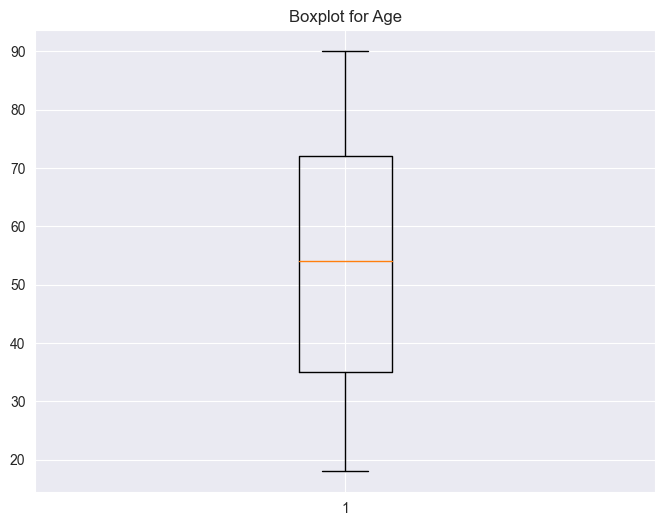

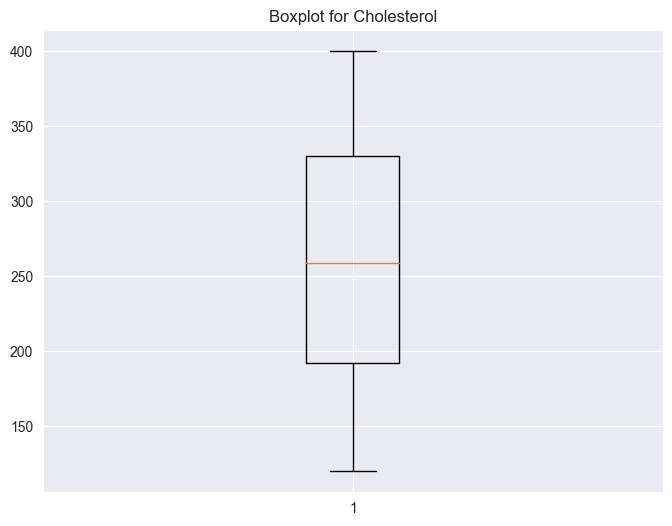

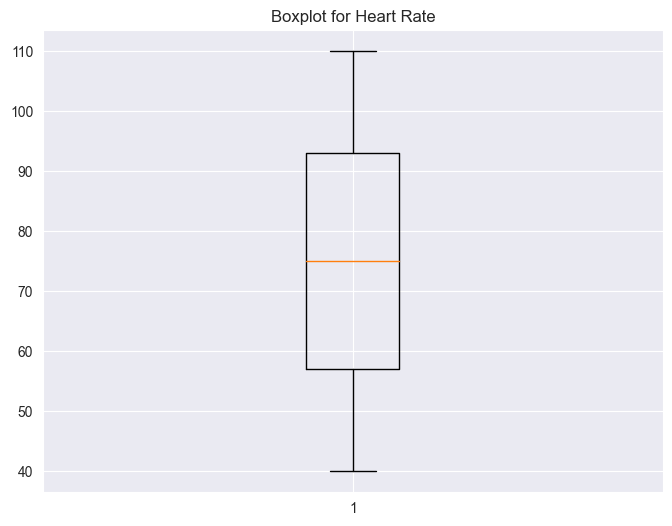

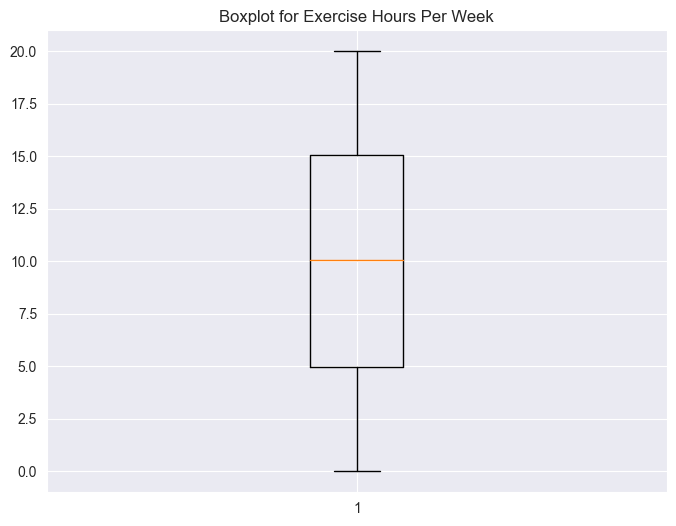

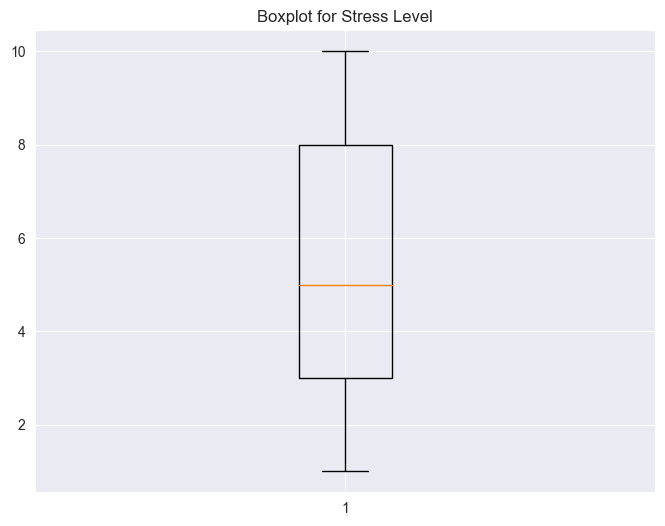

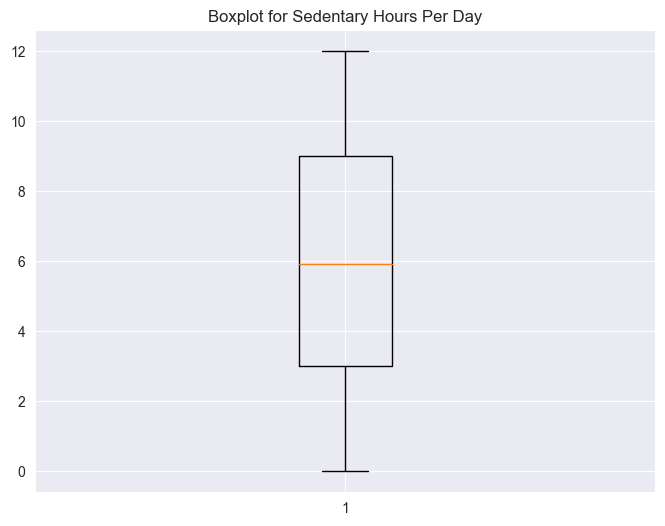

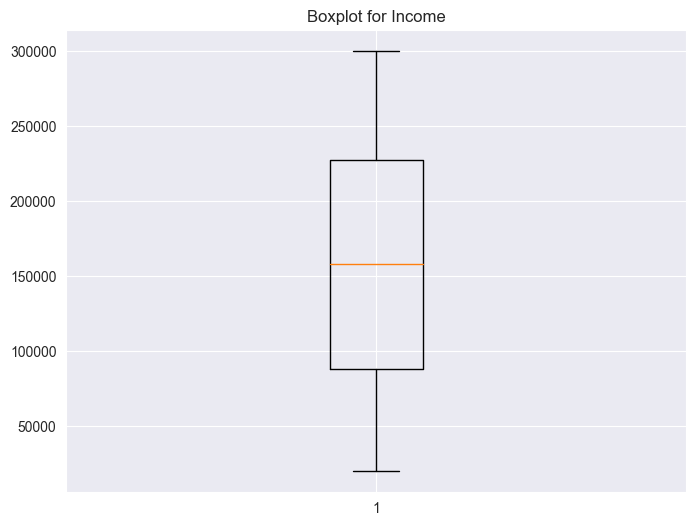

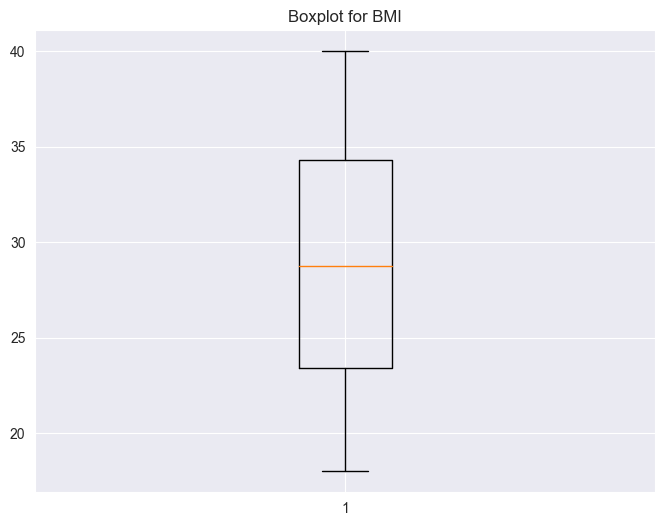

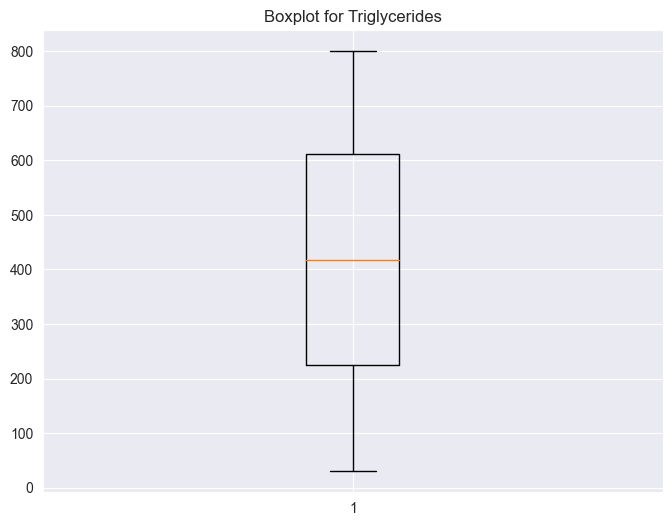

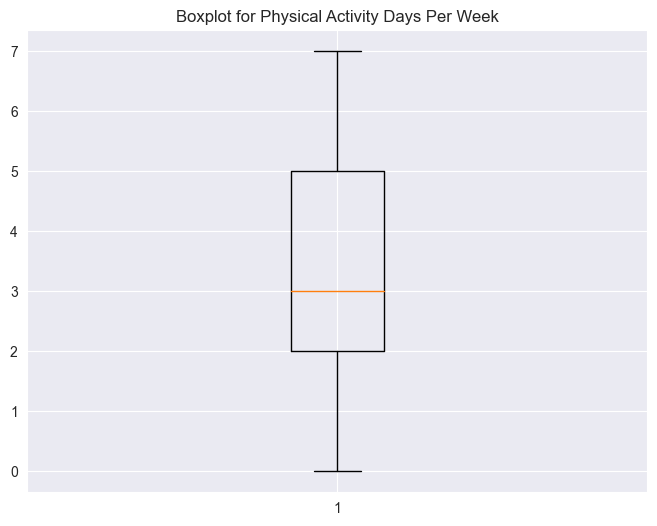

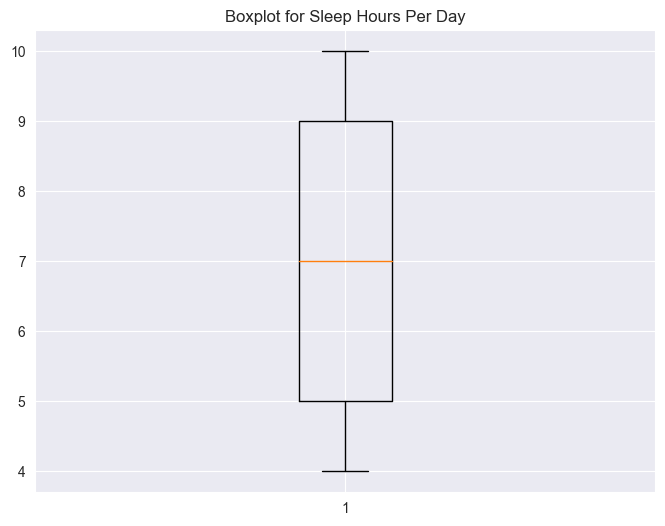

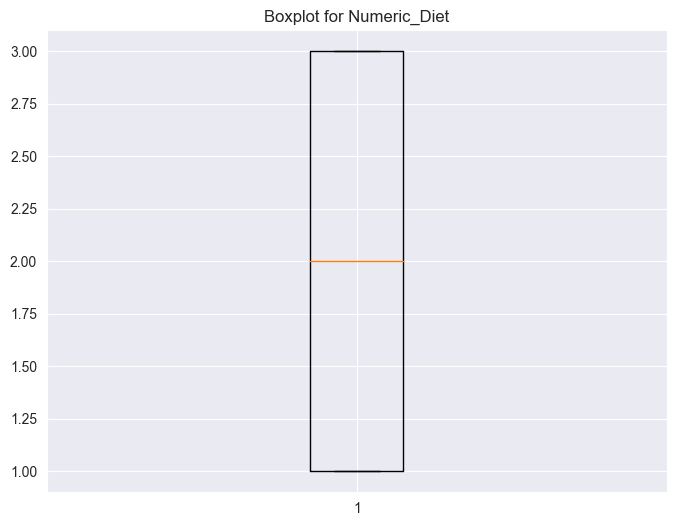

In [9]:
for numeric_column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[numeric_column], showfliers=True)
    plt.title(f'Boxplot for {numeric_column}')
    plt.show()

#end of part1

In [8]:
#validity
pattern = r'^[A-Z]{3}\d{4}$'
valid_patient_values = df['Patient ID'].str.fullmatch(pattern)
patient_validity = len(valid_patient_values) / len(df)
valid_age_values = df[(df['Age'] > 0) & (df['Age'] < 120)]
age_validity = len(valid_age_values) / len(df)
valid_sex_values = df[df['Sex'].isin(['Male', 'Female'])]
sex_validity = len(valid_sex_values) / len(df)
valid_cholesterol_values = df[(df['Cholesterol'] > 0)]
cholesterol_validity = len(valid_cholesterol_values) / len(df)
valid_blood_values = df[(df['Blood Pressure'].str.split('/', expand=True)[0].astype(int) > 0) & (df['Blood Pressure'].str.split('/', expand=True)[1].astype(int) > 0)]
blood_validity = len(valid_blood_values) / len(df)
valid_heart_values = df[df['Heart Rate'] > 0]
heart_validity = len(valid_heart_values) / len(df)
valid_diabets_values = df[df['Diabetes'].isin([0, 1])]
diabets_validity = len(valid_diabets_values) / len(df)
valid_family_values = df[df['Family History'].isin([0, 1])]
family_validity = len(valid_family_values) / len(df)
valid_smoking_values = df[df['Smoking'].isin([0, 1])]
smoking_validity = len(valid_smoking_values) / len(df)
valid_obesity_values = df[df['Obesity'].isin([0, 1])]
obesity_validity = len(valid_obesity_values) / len(df)
valid_alcohol_values = df[df['Alcohol Consumption'].isin([0, 1])]
alcohol_validity = len(valid_alcohol_values) / len(df)
valid_exercise_values = df[(df['Exercise Hours Per Week'] > 0) & (df['Exercise Hours Per Week'] < 7 * 24)]
exercise_validity = len(valid_exercise_values) / len(df)
valid_diet_values = df[df['Diet'].isin(['Unhealthy', 'Average', 'Healthy'])]
diet_validity = len(valid_diet_values) / len(df)
valid_previous_values = df[df['Previous Heart Problems'].isin([0, 1])]
previous_validity = len(valid_previous_values) / len(df)
valid_medication_values = df[df['Medication Use'].isin([0, 1])]
medication_validity = len(valid_medication_values) / len(df)
valid_stress_values = df[df['Stress Level'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]
stress_validity = len(valid_stress_values) / len(df)
valid_sedentary_values = df[(df['Sedentary Hours Per Day'] > 0) & (df['Sedentary Hours Per Day'] < 24)]
sedentary_validity = len(valid_sedentary_values) / len(df)
valid_income_values = df[(df['Income'] > 0)]
income_validity = len(valid_income_values) / len(df)
valid_bmi_values = df[(df['BMI'] > 0)]
bmi_validity = len(valid_bmi_values) / len(df)
valid_triglycerides_values = df[(df['Triglycerides'] > 0)]
triglycerides_validity = len(valid_triglycerides_values) / len(df)
valid_physical_values = df[(df['Physical Activity Days Per Week'] >= 0) & (df['Physical Activity Days Per Week'] <= 7)]
physical_validity = len(valid_physical_values) / len(df)
valid_sleep_values = df[(df['Sleep Hours Per Day'] > 0) & (df['Sleep Hours Per Day'] < 24)]
sleep_validity = len(valid_sleep_values) / len(df)
country_converter = CountryConverter()
valid_country_values = df['Country'].isin(country_converter.data.index)
country_validity = len(valid_country_values) / len(df)
valid_continent_values = df['Continent'].isin(['Africa', 'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America', 'Australia'])
continent_validity = len(valid_continent_values) / len(df)
valid_hemisphere_values = df[df['Hemisphere'].isin(['Southern Hemisphere', 'Northern Hemisphere'])]
hemisphere_validity = len(valid_hemisphere_values) / len(df)
valid_risk_values = df[df['Heart Attack Risk'].isin([0, 1])]
risk_validity = len(valid_risk_values) / len(df)

In [9]:
#consistancy between BMI and Obesity
consistency_BMI_Obesity = df.apply(lambda row: row['Obesity'] == 1 if row['BMI'] >= 30 else row['Obesity'] == 0, axis=1).mean() * 100

print(f" 'BMI' and 'Obesity': {consistency_BMI_Obesity}%")
# inconsistent_rows = df[df['Consistency'] == False][['BMI', 'Obesity']]
# print(inconsistent_rows)

 'BMI' and 'Obesity': 49.047129978317926%


In [10]:
#consistancy between country and continent
cc = CountryConverter()

country_codes = df['Country']

country_mapping = {iso_code: cc.convert(iso_code, to='name') for iso_code in country_codes}
continent_mapping = {iso_code: cc.convert(iso_code, to='continent') for iso_code in country_codes}

all_north_america_countries = [
    'Canada', 'United States', 'Mexico', 'Greenland', 'Guatemala', 'Honduras',
    'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Belize', 'Jamaica',
    'Haiti', 'Dominican Republic', 'Cuba', 'Bahamas', 'Trinidad and Tobago',
    'Barbados', 'Saint Lucia', 'Grenada', 'Saint Vincent and the Grenadines',
    'Antigua and Barbuda', 'Saint Kitts and Nevis', 'Dominica',
]
all_south_america_countries = [
    'Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Ecuador',
    'Bolivia', 'Paraguay', 'Uruguay', 'Guyana', 'Suriname', 'French Guiana',
    'Falkland Islands', 'Guyane',
]
australia_countries = [
    'Australia', 'New Zealand', 'Papua New Guinea', 'Fiji', 'Solomon Islands',
    'Vanuatu', 'Samoa', 'Kiribati', 'Tonga', 'Tuvalu', 'Palau', 'Marshall Islands',
    'Micronesia', 'Nauru'
]

all_north_america_countries = [country.lower() for country in all_north_america_countries]
all_south_america_countries = [country.lower() for country in all_south_america_countries]
australia_countries = [country.lower() for country in australia_countries]

consistency_country_continent =  (
    ((df['Country'].str.lower().isin(all_north_america_countries) | df['Country'].str.lower().isin(all_south_america_countries)) &
     (df['Continent'].isin(['North America', 'South America']))) |
    (df['Country'].str.lower().isin(australia_countries) & (df['Continent'] == 'Australia')) |
    ((df['Country'].map(country_mapping).notna()) &
     (df['Continent'] == df['Country'].map(continent_mapping)))
).mean() * 100

print(consistency_country_continent, "%")

100.0 %


In [11]:
# #consistancy between continent and hemispheres
continent_hemisphere_mapping = {
    'Africa': 'Southern Hemisphere',
    'Asia': 'Northern Hemisphere',
    'Europe': 'Northern Hemisphere',
    'North America': 'Northern Hemisphere',
    'Oceania': 'Southern Hemisphere',
    'South America': 'Southern Hemisphere',
}

consistency_continent_hemispheres = (df['Hemisphere'] == df['Continent'].map(continent_hemisphere_mapping)).mean() * 100
print(consistency_continent_hemispheres, "%")

# inconsistent_rows_mask = df['Hemisphere'] != df['Continent'].map(continent_hemisphere_mapping)
# df[inconsistent_rows_mask]


70.07874015748031 %


In [13]:
table = pd.DataFrame({
    'Name' : df.columns,
    'Number of records': 8763,
    'Number of null values ': df.isnull().sum(),
    'Accuracy': '-' ,
    'Completeness': 1 - df.isnull().mean(),
    'Validity': 0,
    'Currentness': 0,
    'Consistency': 1 ,
})

table.loc['Patient ID', 'Validity'] = patient_validity
table.loc['Age', 'Validity'] = age_validity
table.loc['Sex', 'Validity'] = sex_validity
table.loc['Cholesterol', 'Validity'] = cholesterol_validity
table.loc['Blood Pressure', 'Validity'] = blood_validity
table.loc['Heart Rate', 'Validity'] = heart_validity
table.loc['Diabetes', 'Validity'] = diabets_validity
table.loc['Family History', 'Validity'] = family_validity
table.loc['Smoking', 'Validity'] = smoking_validity
table.loc['Obesity', 'Validity'] = obesity_validity
table.loc['Alcohol Consumption', 'Validity'] = alcohol_validity
table.loc['Exercise Hours Per Week', 'Validity'] = exercise_validity
table.loc['Diet', 'Validity'] = diet_validity
table.loc['Previous Heart Problems', 'Validity'] = previous_validity
table.loc['Medication Use', 'Validity'] = medication_validity
table.loc['Stress Level', 'Validity'] = stress_validity
table.loc['Sedentary Hours Per Day', 'Validity'] = sedentary_validity
table.loc['Income', 'Validity'] = income_validity
table.loc['BMI', 'Validity'] = bmi_validity
table.loc['Triglycerides', 'Validity'] = triglycerides_validity
table.loc['Physical Activity Days Per Week', 'Validity'] = physical_validity
table.loc['Sleep Hours Per Day', 'Validity'] = sleep_validity
table.loc['Country', 'Validity'] = country_validity
table.loc['Continent', 'Validity'] = continent_validity
table.loc['Hemisphere', 'Validity'] = hemisphere_validity
table.loc['Heart Attack Risk', 'Validity'] = risk_validity
table.loc['Country', 'Consistency'] = consistency_country_continent
table.loc['Continent', 'Consistency'] = (consistency_country_continent + consistency_continent_hemispheres) / 2
table.loc['Hemisphere', 'Consistency'] = consistency_continent_hemispheres
table.loc['BMI' , 'Consistency'] = consistency_BMI_Obesity
table.loc['Obesity' , 'Consistency'] = consistency_BMI_Obesity

table

#end of part2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25356\4066288898.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '85.03937007874015' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  table.loc['Continent', 'Consistency'] = (consistency_country_continent + consistency_continent_hemispheres) / 2


,Name,Number of records,Number of null values,Accuracy,Completeness,Validity,Currentness,Consistency
Patient ID,Patient ID,8763,0,-,1.0,1,0,1.00000
Age,Age,8763,0,-,1.0,1,0,1.00000
Sex,Sex,8763,0,-,1.0,1,0,1.00000
Cholesterol,Cholesterol,8763,0,-,1.0,1,0,1.00000
Blood Pressure,Blood Pressure,8763,0,-,1.0,1,0,1.00000
Heart Rate,Heart Rate,8763,0,-,1.0,1,0,1.00000
Diabetes,Diabetes,8763,0,-,1.0,1,0,1.00000
Family History,Family History,8763,0,-,1.0,1,0,1.00000
Smoking,Smoking,8763,0,-,1.0,1,0,1.00000
Obesity,Obesity,8763,0,-,1.0,1,0,49.04713


In [15]:
#Normalize
income_values = df['Income'].values.reshape(-1, 1)
scaler = MinMaxScaler()

df['Income'] = scaler.fit_transform(income_values)

In [16]:
#Feature Generation
df[['Systolic','Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])


In [17]:
#Feature Generation
df.loc[(df['Smoking'] == 0) & (df['Alcohol Consumption'] == 0) & ((df['Diet'] == 'Healthy') | (df['Diet'] == 'Average')),'Lifestyle'] = 1
df.loc[(df['Smoking'] == 1) | (df['Diet'] == 'Unhealthy') | (df['Alcohol Consumption'] == 1) , 'Lifestyle'] = 0

In [18]:
#reduction
df_reduced = df.drop(['Patient ID', 'Blood Pressure', 'Continent', 'Hemisphere' , 'Obesity'], axis=1)
df_reduced

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Numeric_Diet,Systolic,Diastolic,Lifestyle
0,67,Male,208,72,0,0,1,0,4.168189,Average,...,31.251233,286,0,6,Argentina,0,2,158,88,0.0
1,21,Male,389,98,1,1,1,1,1.813242,Unhealthy,...,27.194973,235,1,7,Canada,0,1,165,93,0.0
2,21,Female,324,72,1,0,0,0,2.078353,Healthy,...,28.176571,587,4,4,France,0,3,174,99,1.0
3,84,Male,383,73,1,1,1,1,9.828130,Average,...,36.464704,378,3,4,Canada,0,2,163,100,0.0
4,66,Male,318,93,1,1,1,0,5.804299,Unhealthy,...,21.809144,231,1,5,Thailand,0,1,91,88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,1,7.917342,Healthy,...,19.655895,67,7,7,Thailand,0,3,94,76,0.0
8759,28,Female,120,73,1,0,0,0,16.558426,Healthy,...,23.993866,617,4,9,Canada,0,3,157,102,1.0
8760,47,Male,250,105,0,1,1,1,3.148438,Average,...,35.406146,527,4,4,Brazil,1,2,161,75,0.0
8761,36,Male,178,60,1,0,1,0,3.789950,Unhealthy,...,27.294020,114,2,8,Brazil,0,1,119,67,0.0


In [20]:
#visualize
numeric_columns = df_reduced.select_dtypes(include=['number']).columns
binary_columns = []
for column in numeric_columns:
    unique_values = df_reduced[column].unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        binary_columns.append(column)

numeric_columns = [col for col in numeric_columns if col not in binary_columns]

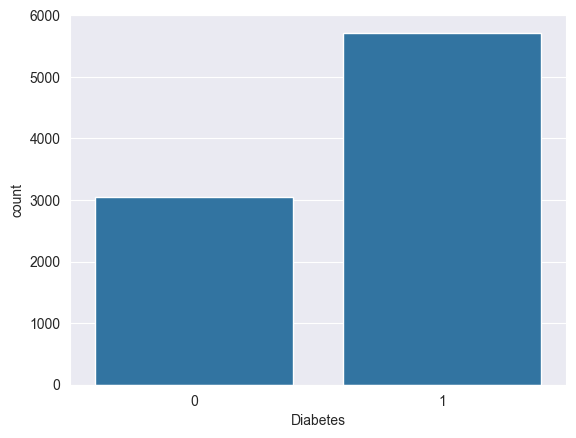

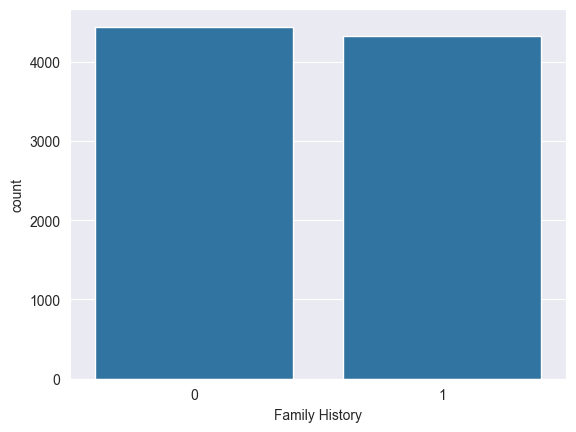

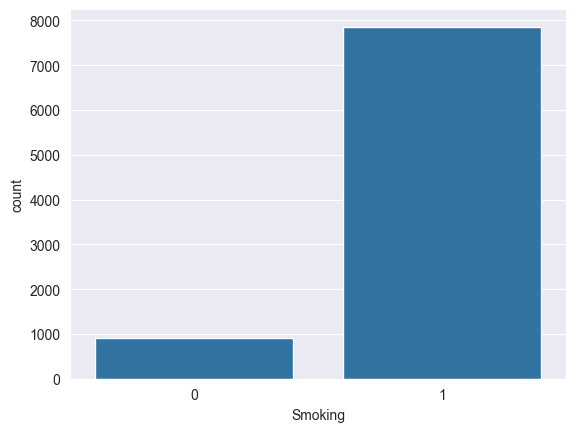

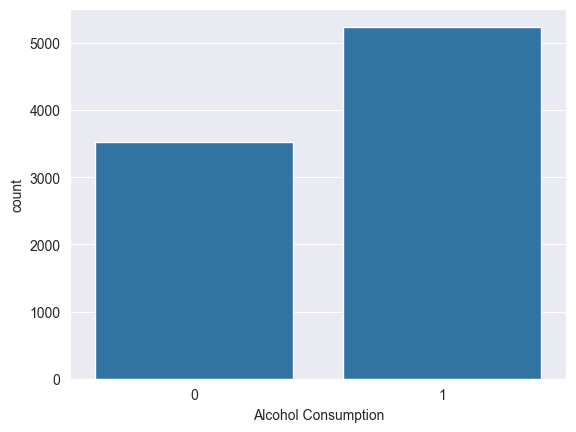

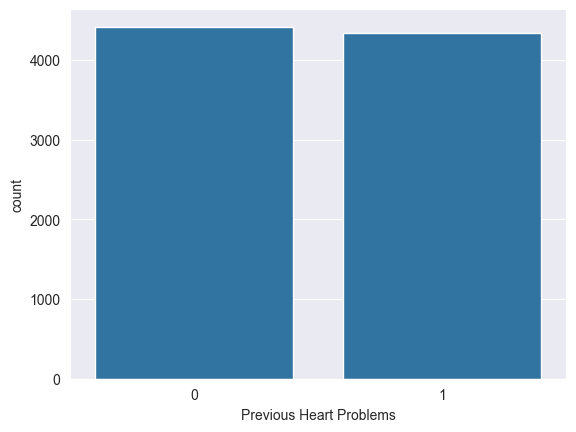

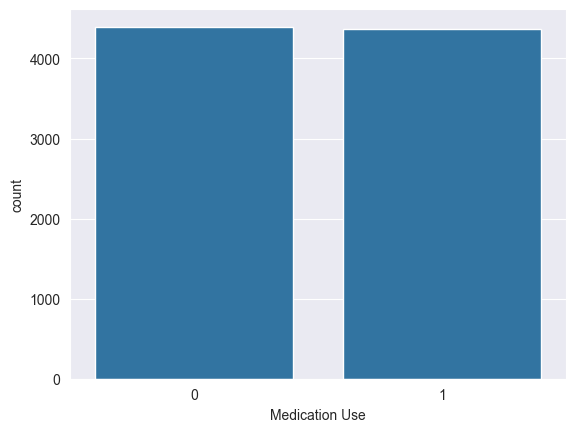

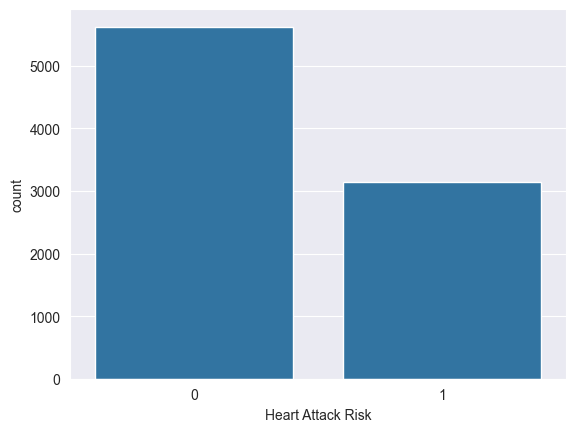

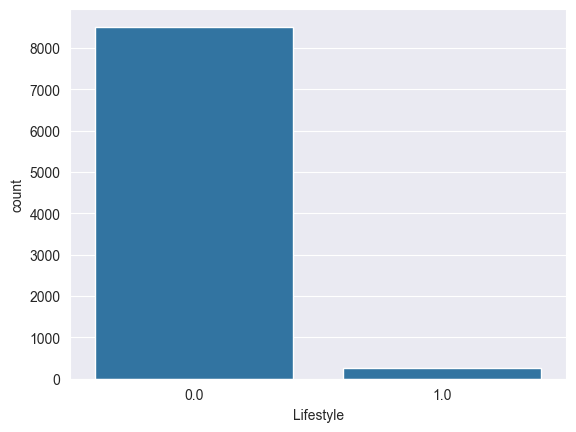

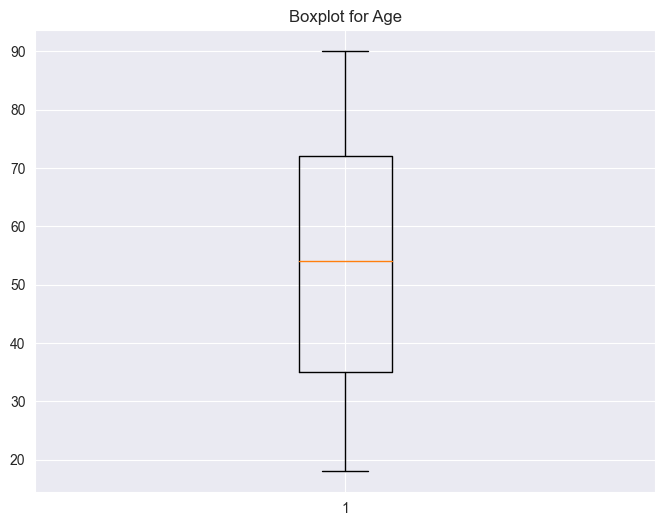

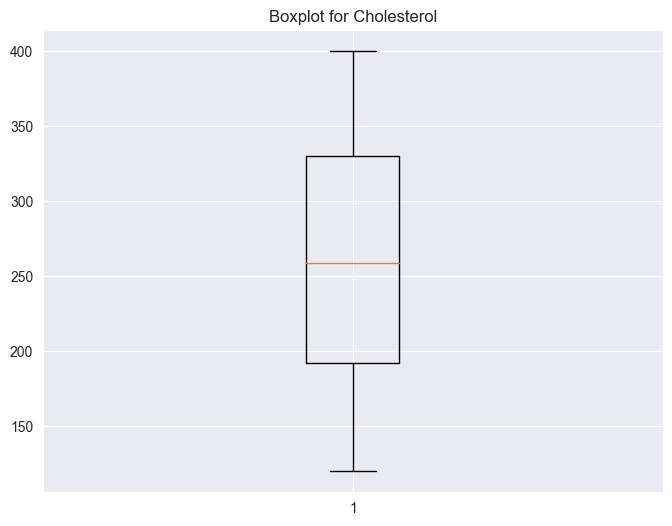

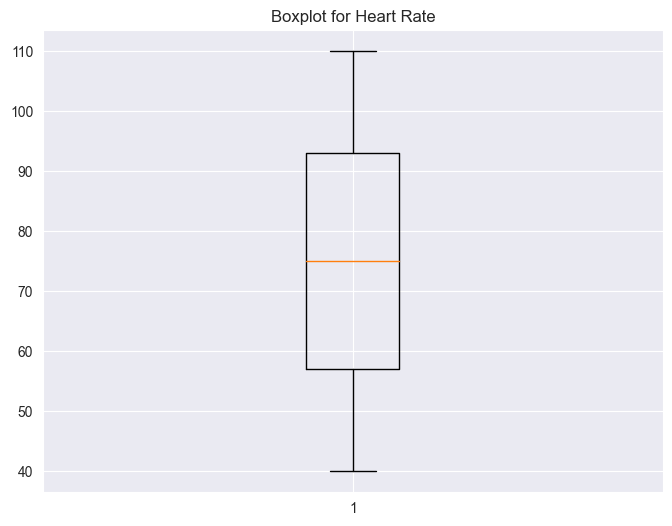

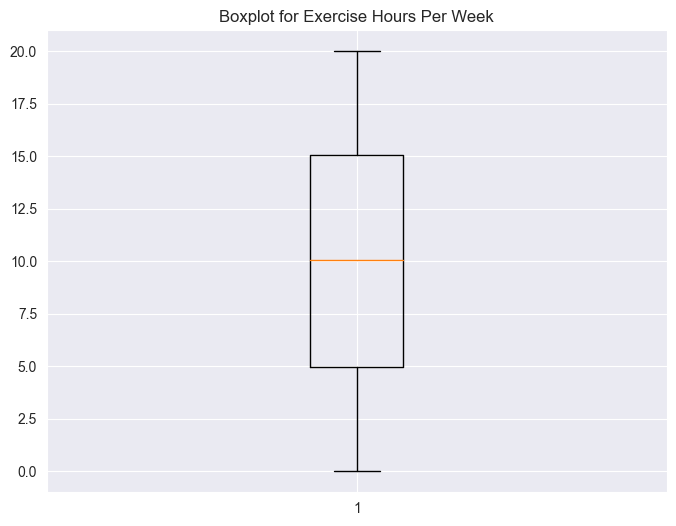

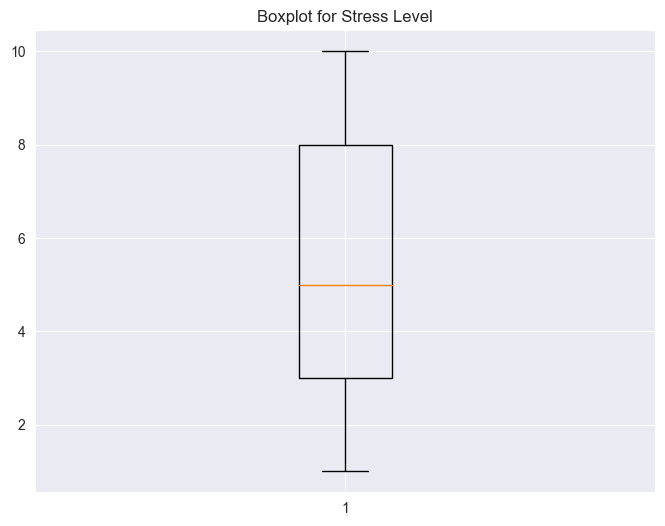

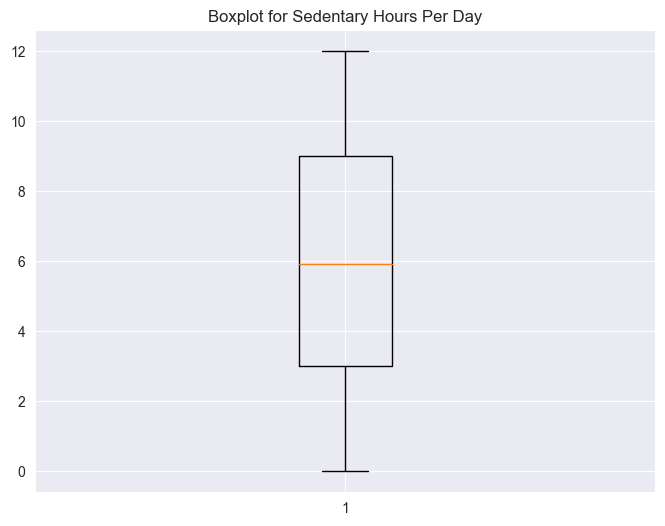

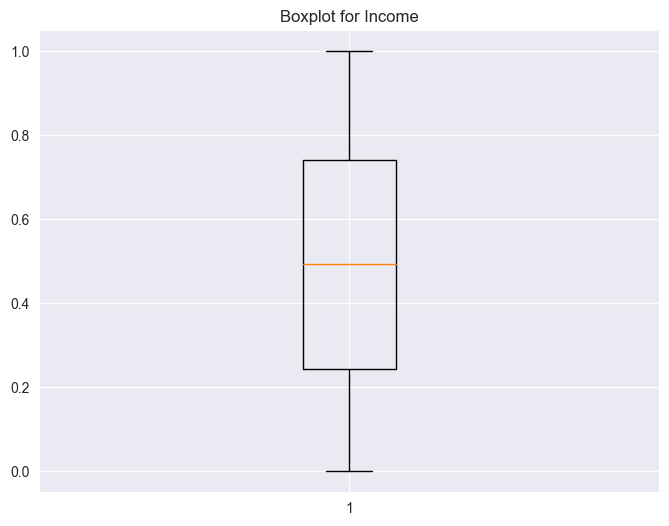

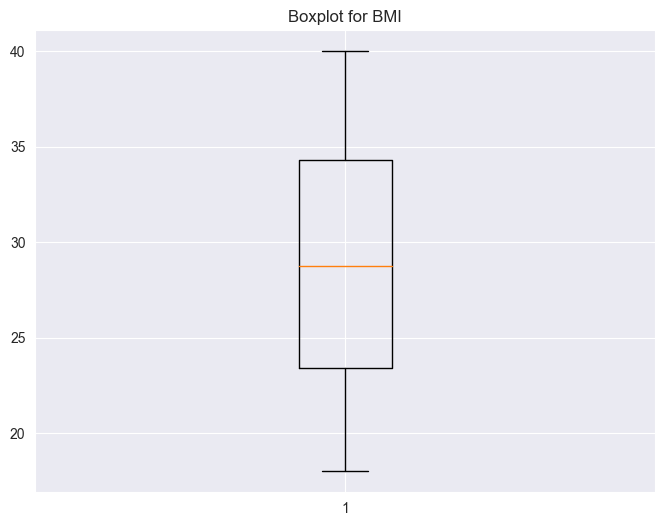

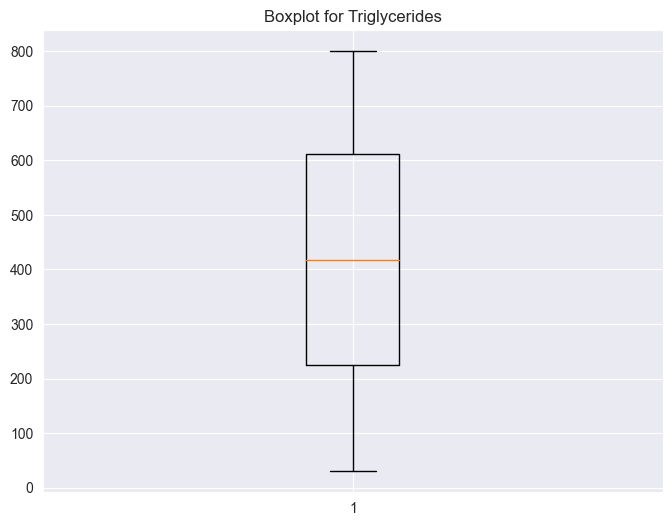

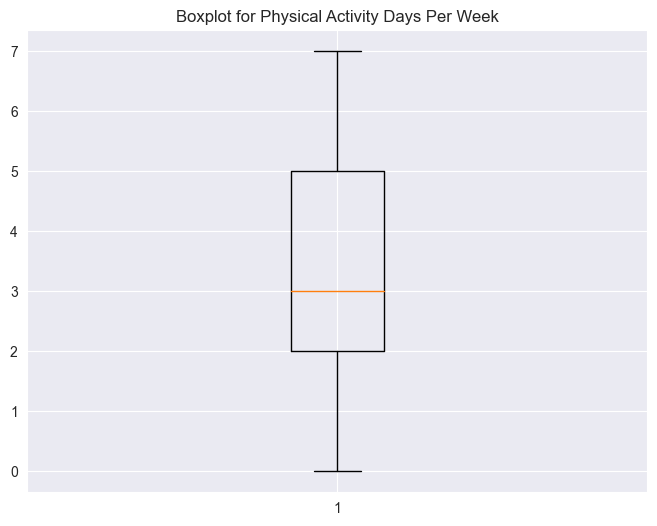

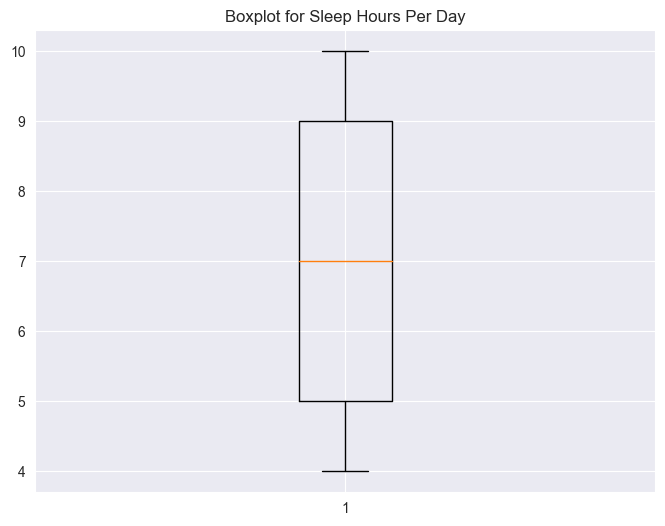

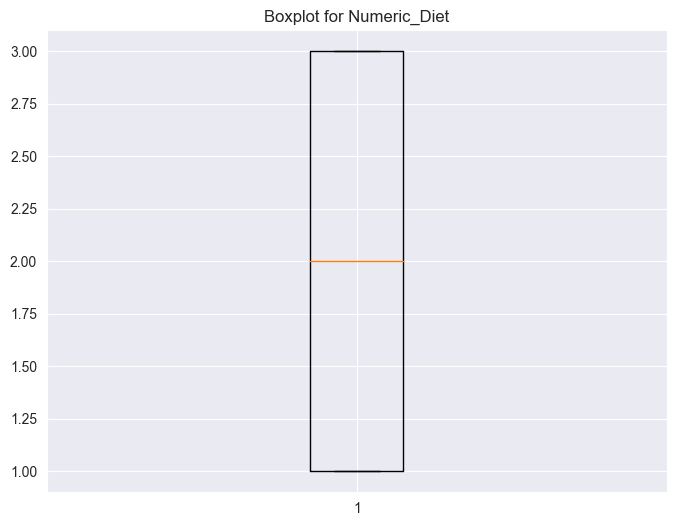

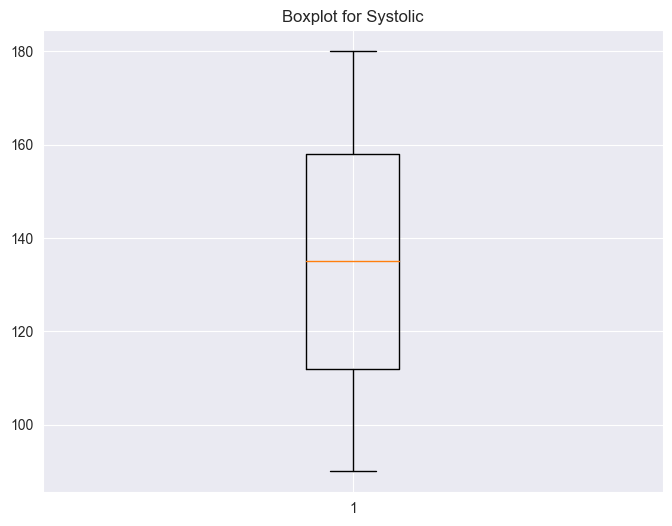

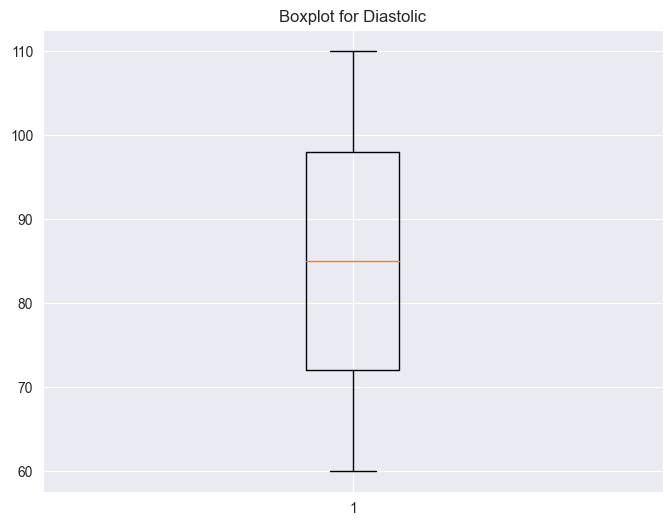

In [21]:
for binary_column in binary_columns:
    sns.countplot(x=binary_column, data=df)
    plt.show()


for numeric_column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[numeric_column], showfliers=True)
    plt.title(f'Boxplot for {numeric_column}')
    plt.show()


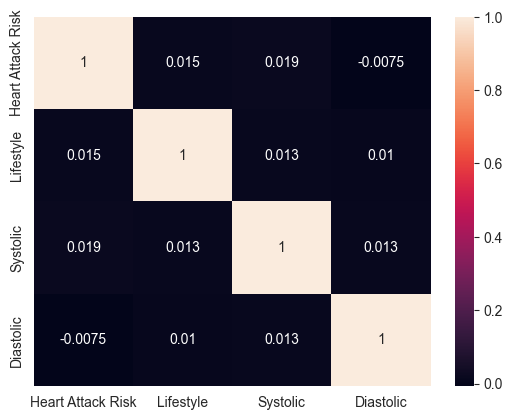

In [31]:
#checking new feature
subset_columns = ['Heart Attack Risk'] + ['Lifestyle'] + ['Systolic'] + ['Diastolic']
_ = sns.heatmap(df_reduced[subset_columns].corr(method='pearson'), annot=True)

                                      Age  Cholesterol  Heart Rate  \
Age                              1.000000    -0.009107   -0.003844   
Cholesterol                     -0.009107     1.000000    0.000315   
Heart Rate                      -0.003844     0.000315    1.000000   
Exercise Hours Per Week          0.001206     0.021517    0.008276   
Stress Level                     0.018307    -0.024487   -0.004547   
Sedentary Hours Per Day          0.017280     0.018914   -0.010232   
Income                          -0.001733     0.000007    0.004873   
BMI                             -0.002612     0.017292    0.005299   
Triglycerides                    0.003415    -0.005454    0.012244   
Physical Activity Days Per Week  0.001384     0.016056    0.000834   
Sleep Hours Per Day             -0.002185     0.004456    0.001811   
Numeric_Diet                    -0.013230    -0.010765   -0.003014   
Systolic                         0.003070     0.000133    0.008482   
Diastolic           

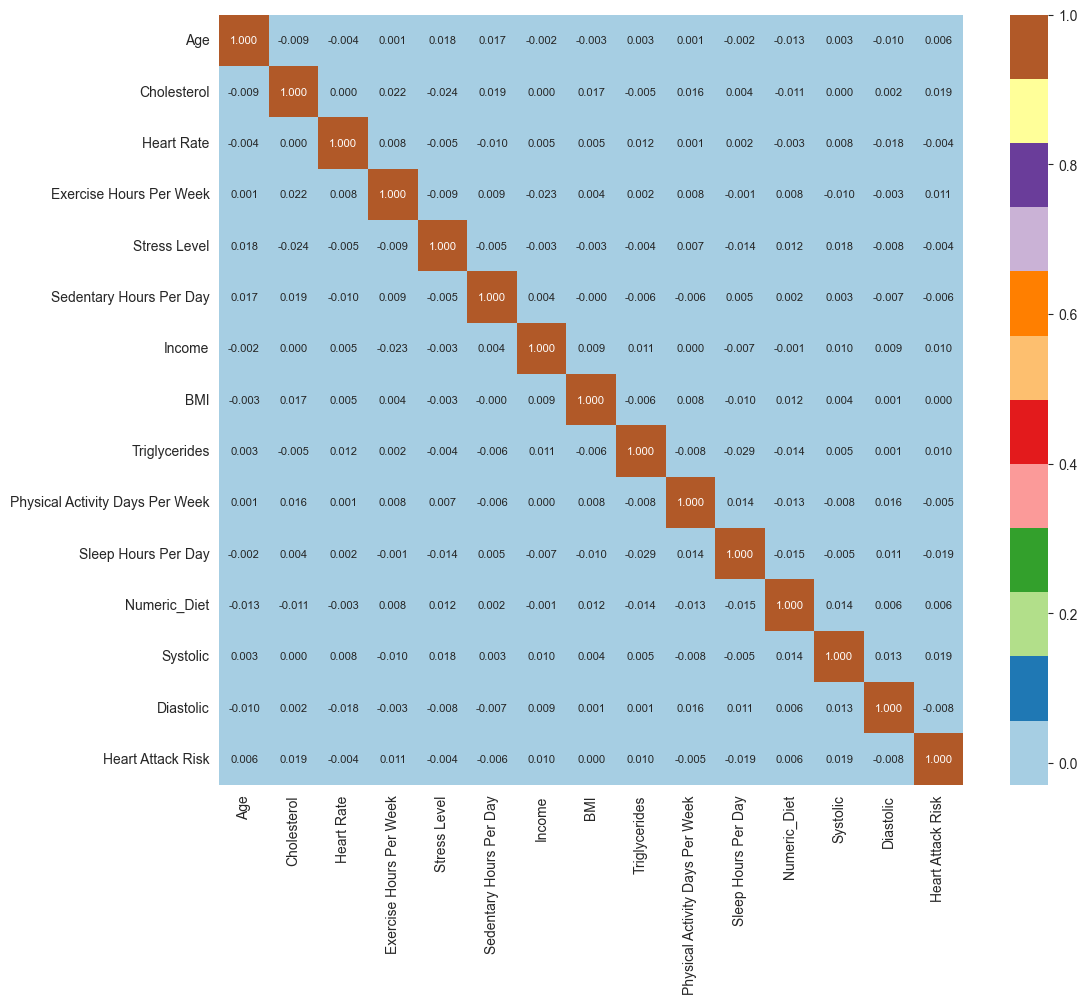

In [22]:
#correlation for numeric
subset_columns = numeric_columns + ['Heart Attack Risk']
print(df_reduced[subset_columns].corr(method='pearson'))
plt.figure(figsize=(12, 10))
sns.heatmap(df_reduced[subset_columns].corr(method='pearson'), cmap='Paired', annot=True, fmt=".3f", annot_kws={"size": 8})
plt.show()

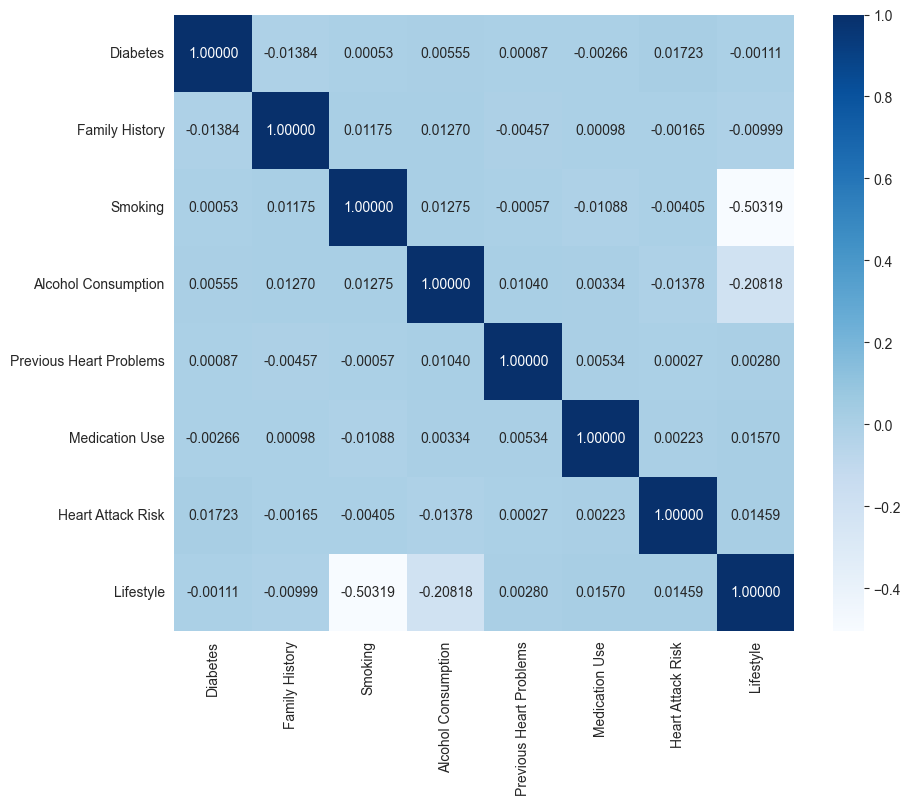

In [27]:
#correlation for binary
plt.figure(figsize=(10, 8))
sns.heatmap( df_reduced[binary_columns].corr(method='pearson'), annot=True, cmap='Blues', fmt=".5f")
plt.show()

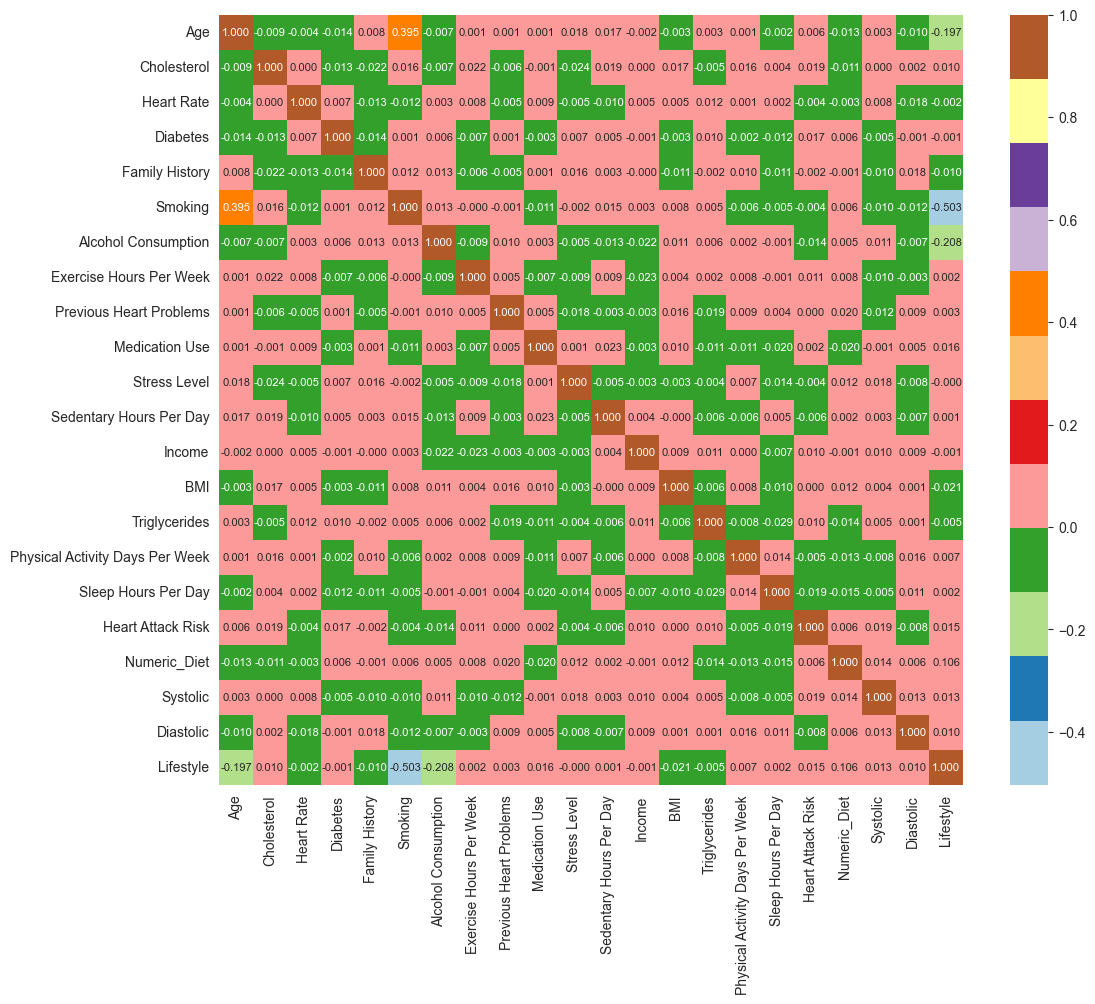

In [28]:
#correlation for all numeric and binary
plt.figure(figsize=(12, 10))
sns.heatmap(df_reduced[df_reduced.select_dtypes(include=['number']).columns].corr(method='pearson'), cmap='Paired', annot=True, fmt=".3f", annot_kws={"size": 8})
plt.show()
